In [20]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
df = pd.read_csv('car_sales_data.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [23]:
df.isna().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [24]:
df.isnull().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [25]:
df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [26]:
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


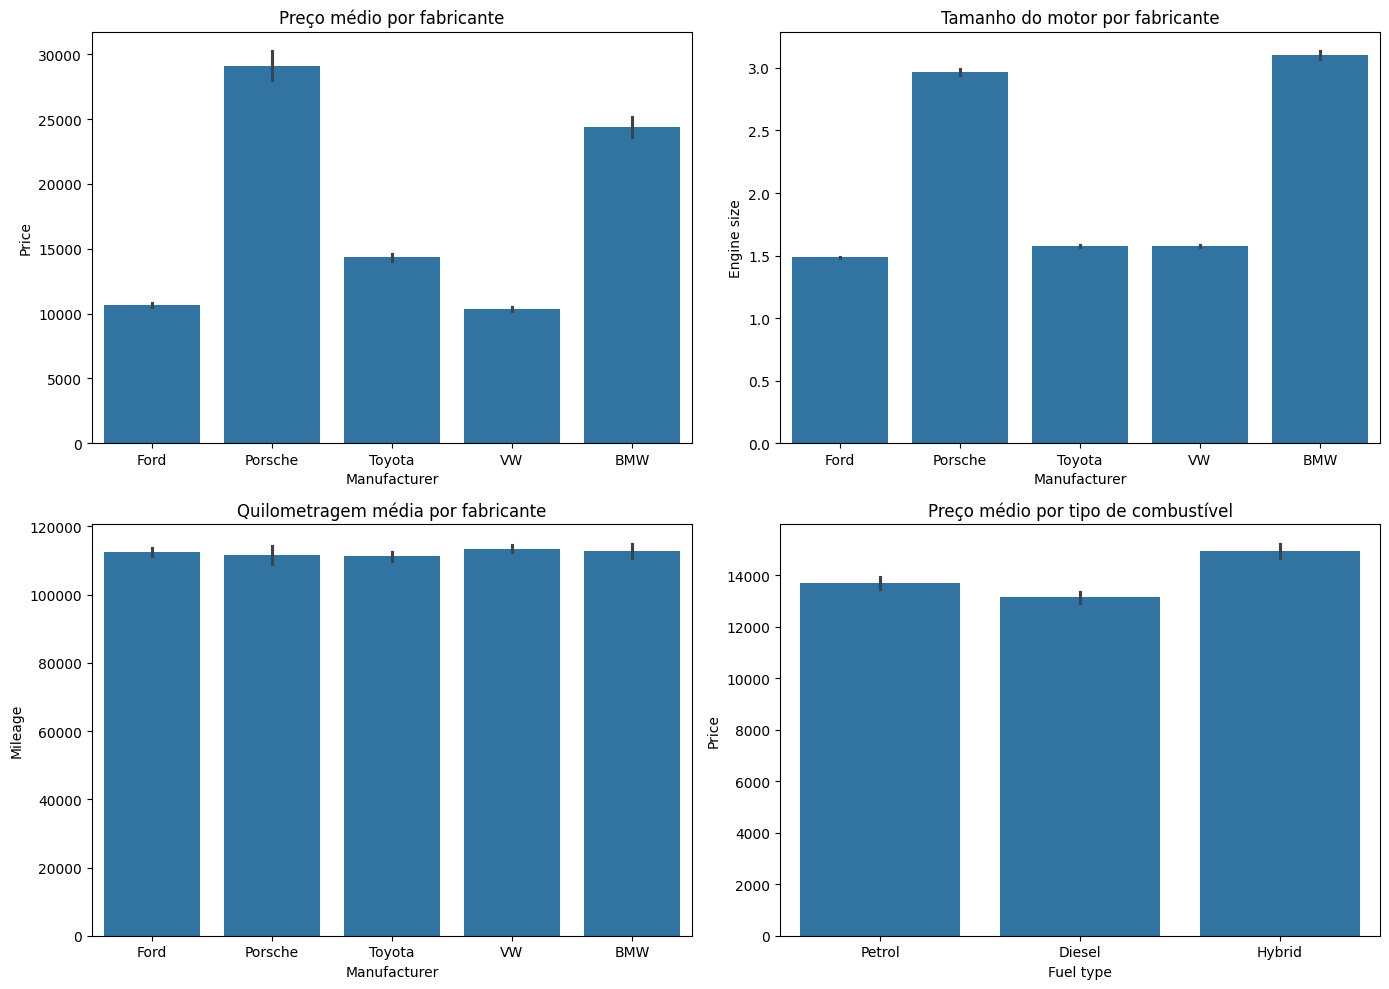

In [27]:
# Grade dos subpltots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(data=df, x='Manufacturer', y='Price', ax=axes[0, 0])
axes[0, 0].set_title("Preço médio por fabricante")

sns.barplot(data=df, x='Manufacturer', y='Engine size', ax=axes[0, 1])
axes[0, 1].set_title("Tamanho do motor por fabricante")

sns.barplot(data=df, x='Manufacturer', y='Mileage', ax=axes[1, 0])
axes[1, 0].set_title("Quilometragem média por fabricante")

sns.barplot(data=df, x='Fuel type', y='Price', ax=axes[1, 1])
axes[1, 1].set_title("Preço médio por tipo de combustível")

plt.tight_layout()
plt.show()

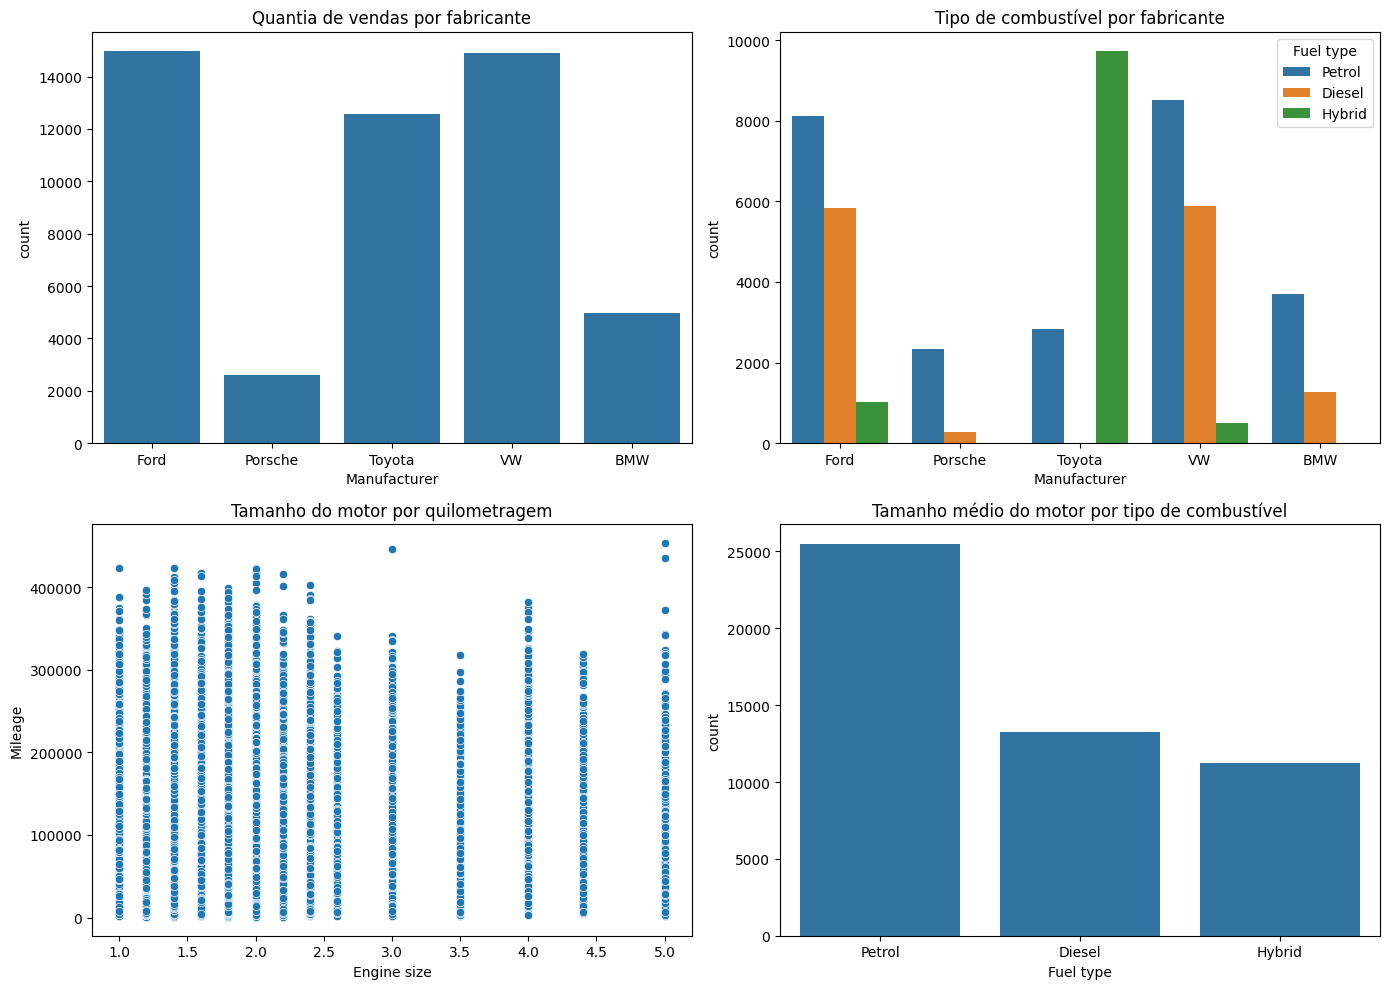

In [28]:
# Grade dos subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(data=df, x='Manufacturer', ax=axes[0, 0])
axes[0, 0].set_title("Quantia de vendas por fabricante")

sns.countplot(data=df, x='Manufacturer', hue='Fuel type', ax=axes[0, 1])
axes[0, 1].set_title("Tipo de combustível por fabricante")

sns.scatterplot(data=df, x='Engine size', y='Mileage', ax=axes[1, 0])
axes[1, 0].set_title("Tamanho do motor por quilometragem")

sns.countplot(data=df, x='Fuel type', ax=axes[1, 1])
axes[1, 1].set_title("Tamanho médio do motor por tipo de combustível")

plt.tight_layout()
plt.show()

In [29]:
combustivel_freq = df['Fuel type'].value_counts()
combustivel_perc = df['Fuel type'].value_counts(normalize=True) * 100
print("\n=== Tipo de combustível ===")
print(pd.DataFrame({'Frequência': combustivel_freq, 'Percentual (%)': combustivel_perc.round(2)}))


=== Tipo de combustível ===
           Frequência  Percentual (%)
Fuel type                            
Petrol          25488           50.98
Diesel          13268           26.54
Hybrid          11244           22.49


In [30]:
fabricante_freq = df['Manufacturer'].value_counts()
fabricante_perc = df['Manufacturer'].value_counts(normalize=True) * 100
print("=== Fabricante ===")
print(pd.DataFrame({'Frequência': fabricante_freq, 'Percentual (%)': fabricante_perc.round(2)}).head())

=== Fabricante ===
              Frequência  Percentual (%)
Manufacturer                            
Ford               14959           29.92
VW                 14913           29.83
Toyota             12554           25.11
BMW                 4965            9.93
Porsche             2609            5.22


In [31]:
df['Decada'] = (df['Year of manufacture'] // 10) * 10
decada_freq = df['Decada'].value_counts().sort_index()
decada_perc = df['Decada'].value_counts(normalize=True)* 100
print("\n=== Distribuição por década de fabricação ===")
print(pd.DataFrame({'Frequência': decada_freq, 'Percentual (%)': decada_perc.round(2)}))



=== Distribuição por década de fabricação ===
        Frequência  Percentual (%)
Decada                            
1980          3168            6.34
1990         14439           28.88
2000         15330           30.66
2010         15229           30.46
2020          1834            3.67


In [32]:
g1 = df.loc[df['Fuel type']=='Petrol', 'Price']
g2 = df.loc[df['Fuel type']=='Diesel', 'Price']
stats.ttest_ind(g1, g2, equal_var=False)


TtestResult(statistic=np.float64(3.3682556061336437), pvalue=np.float64(0.0007572637646124077), df=np.float64(35249.69173182213))

In [33]:
# Tratamento de dados e engenharia de variáveis

# Calculando a idade do carro
current_year = 2025  # Ano atual
df['Car_Age'] = current_year - df['Year of manufacture']

# Criando categorias de preço
df['Price_Category'] = pd.qcut(df['Price'], q=4, labels=['Economic', 'Mid-Range', 'Premium', 'Luxury'])

# Calculando eficiência de combustível (km/l)
df['Fuel_Efficiency'] = df['Mileage'] / df['Engine size']

# Criando categoria de tamanho do motor
df['Engine_Category'] = pd.qcut(df['Engine size'], q=3, labels=['Small', 'Medium', 'Large'])

# Verificando o resultado das transformações
print("\n=== Novas variáveis criadas ===")
print(df[['Car_Age', 'Price_Category', 'Fuel_Efficiency', 'Engine_Category']].head())


=== Novas variáveis criadas ===
   Car_Age Price_Category  Fuel_Efficiency Engine_Category
0       23      Mid-Range    127300.000000           Small
1        9         Luxury     14462.500000           Large
2       11         Luxury     24493.750000          Medium
3       37       Economic    117118.888889          Medium
4       19      Mid-Range    127869.000000           Small


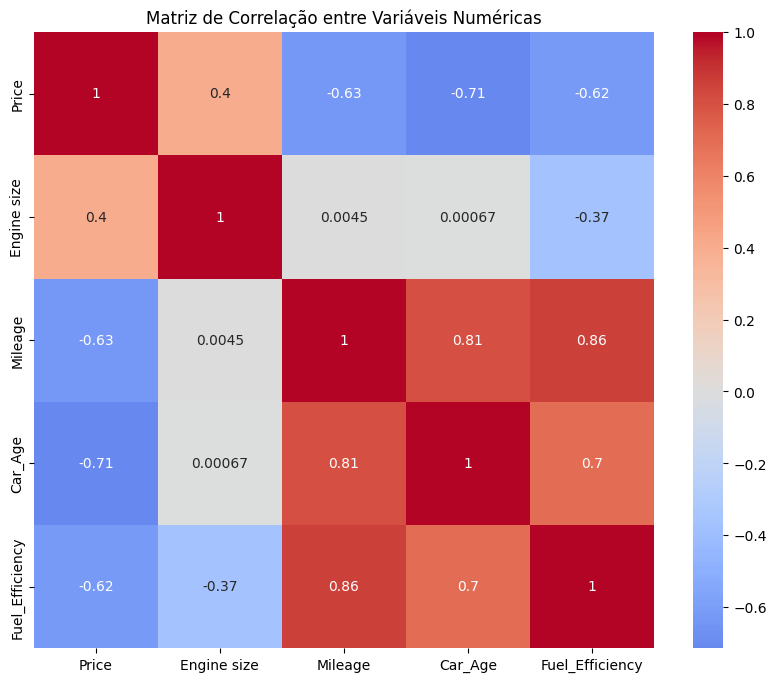

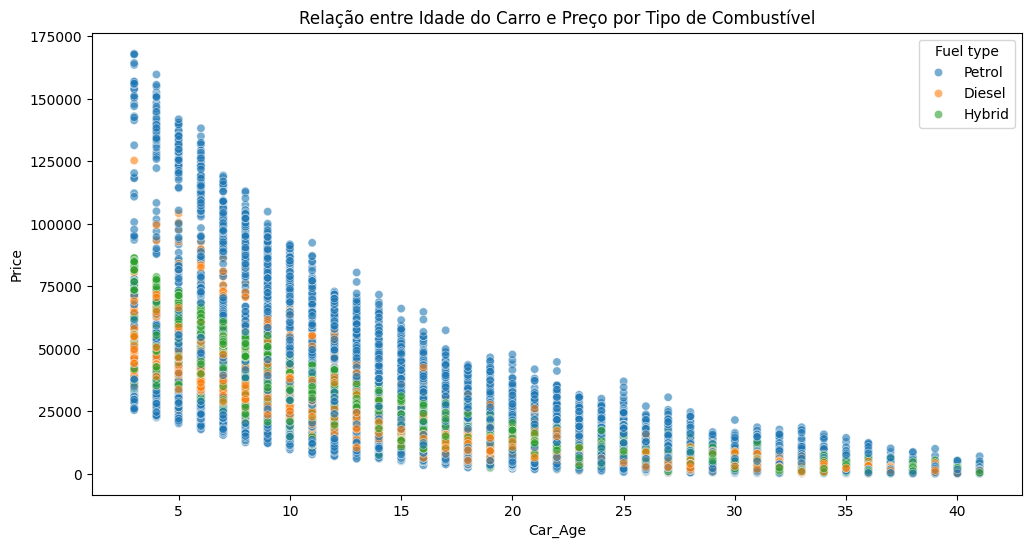

In [34]:
# Análise de correlações e relações entre variáveis

# Matriz de correlação
numeric_cols = ['Price', 'Engine size', 'Mileage', 'Car_Age', 'Fuel_Efficiency']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

# Análise da relação entre idade do carro e preço por tipo de combustível
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Car_Age', y='Price', hue='Fuel type', alpha=0.6)
plt.title('Relação entre Idade do Carro e Preço por Tipo de Combustível')
plt.show()



In [35]:
# Selecionando variáveis para o modelo
features = ["Engine size", "Mileage", "Car_Age"]
X = df[features]
y = df["Price"]

# Dividindo dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predições
y_pred = model.predict(X_test)

# Avaliação do modelo
print("=== Avaliação do Modelo de Regressão Linear ===")
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

# Coeficientes do modelo
coef = pd.DataFrame(model.coef_, index=features, columns=["Coeficiente"])
print("\nCoeficientes do modelo:")
print(coef)
print(f"Intercepto: {model.intercept_:.2f}")

=== Avaliação do Modelo de Regressão Linear ===
R²: 0.6715
MAE: 6091.46
RMSE: 9442.38

Coeficientes do modelo:
             Coeficiente
Engine size  8931.978776
Mileage        -0.038014
Car_Age      -987.317147
Intercepto: 22785.39


In [36]:
# 1) Intervalo de confiança para a média do preço
preco = df["Price"]
media_preco = preco.mean()
ic_preco = stats.t.interval(0.95, len(preco.dropna())-1, loc=media_preco)

# 2) Intervalo de confiança para a média da quilometragem
mileage = df["Mileage"]
media_mileage = mileage.mean()
ic_mileage = stats.t.interval(0.95, len(mileage.dropna())-1, loc=media_mileage)

# 3) Intervalo de confiança para a média do tamanho do motor (Engine size)
engine = df["Engine size"]
media_engine = engine.mean()
ic_engine = stats.t.interval(0.95, len(engine.dropna())-1, loc=media_engine)

intervalos = {
    "Preço": {"media": round(media_preco,2), "IC95%": (round(ic_preco[0],2), round(ic_preco[1],2))},
    "Quilometragem": {"media": round(media_mileage,2), "IC95%": (round(ic_mileage[0],2), round(ic_mileage[1],2))},
    "Engine size": {"media": round(media_engine,2), "IC95%": (round(ic_engine[0],2), round(ic_engine[1],2))},
}

intervalos

{'Preço': {'media': np.float64(13828.9),
  'IC95%': (np.float64(13826.94), np.float64(13830.86))},
 'Quilometragem': {'media': np.float64(112497.32),
  'IC95%': (np.float64(112495.36), np.float64(112499.28))},
 'Engine size': {'media': np.float64(1.77),
  'IC95%': (np.float64(-0.19), np.float64(3.73))}}